# Capital Asset Pricing Model

To calculate the Capital Asset Pricing Model (CAPM) for your cryptocurrency portfolio, you'll need to gather and compute several key indicators. CAPM is a model used to determine the expected return on an asset based on its risk relative to the market. The formula for CAPM is:



**Expected Return= R𝑓 + 𝛽 × (Rm− Rf)**

Where:

- R𝑓 is the risk-free rate.
- 𝛽 (beta) is the measure of the asset's volatility relative to the market.
- 𝑅𝑚 is the expected market return.
- (𝑅𝑚 − 𝑅𝑓) is the market risk premium.



## Steps to Calculate CAPM for Cryptocurrencies

1. Determine the Risk-Free Rate (R𝑓)
    
    The risk-free rate is typically the return on government bonds, such as U.S. Treasury bills. For cryptocurrencies, you can use the yield on a 10-year U.S. Treasury bond as a proxy for the risk-free rate.

2. Calculate the Expected Market Return (𝑅𝑚)
    
    The expected market return can be the average return of a broad cryptocurrency market index. For example, you could use an index like the Bloomberg Galaxy Crypto Index (BGCI) or another comprehensive crypto index.

3. Calculate the Beta (𝛽)
    
    Beta measures the volatility of a cryptocurrency relative to the market. To calculate beta, follow these steps:

    - Collect Historical Price Data: Obtain historical daily prices for each cryptocurrency and the chosen market index.

    - Calculate Returns: Compute the daily returns for each cryptocurrency and the market index.

    - Run a Regression Analysis: Perform a linear regression with the cryptocurrency returns as the dependent variable and the market index returns as the independent variable. The slope of the regression line is the beta.

4. Compute the Market Risk Premium (𝑅𝑚 − 𝑅𝑓)
    
    The market risk premium is the difference between the expected market return and the risk-free rate.







##

In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Define the cryptocurrencies and the index
cryptos = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'XRP-USD', 'TON-USD', 'DOGE-USD', 'ADA-USD', 'SHIB-USD', 'AVAX-USD']
index = 'BITW'

# Define the start and end dates
start_date = '2022-01-01'
end_date = '2024-01-01'

# Download data for the cryptocurrencies and the index
data = yf.download(cryptos + [index], start=start_date, end=end_date)


[*********************100%%**********************]  11 of 11 completed


In [33]:
data.head()

Price      Adj Close                                                   \
Ticker       ADA-USD    AVAX-USD       BITW     BNB-USD       BTC-USD   
Date                                                                    
2022-01-01  1.376975  114.158012        NaN  527.352722  47686.812500   
2022-01-02  1.377584  113.186333        NaN  531.396667  47345.218750   
2022-01-03  1.321637  108.145210  38.209999  512.135986  46458.117188   
2022-01-04  1.311658  103.239243  39.299999  507.506104  45897.574219   
2022-01-05  1.236002   97.852577  38.500000  475.056946  43569.003906   

Price                                                              ...  \
Ticker      DOGE-USD      ETH-USD  SHIB-USD     SOL-USD   TON-USD  ...   
Date                                                               ...   
2022-01-01  0.173035  3769.697021  0.000034  178.517944  5.432227  ...   
2022-01-02  0.174403  3829.564941  0.000034  176.382843  5.678127  ...   
2022-01-03  0.170088  3761.380371  0.000033  170.297745  5.714999  ...   
2022-01-04  0.168803  3794.056641  0.000032  167.938904  5.985152  ...   
2022-01-05  0.159420  3550.386963  0.000030  155.099731  5.271205  ...   

Price           Volume                                                \
Ticker        AVAX-USD      BITW     BNB-USD      BTC-USD   DOGE-USD   
Date                                                                   
2022-01-01   784319683       NaN  1622547014  24582667004  371336089   
2022-01-02   777052324       NaN  1462276185  27951569547  391041933   
2022-01-03   894675873  240100.0  1949153130  33071628362  505900382   
2022-01-04   918513472   71600.0  2200879165  42494677905  541922892   
2022-01-05  1168896098  106300.0  2870757788  36851084859  994086848   

Price                                                                  
Ticker          ETH-USD    SHIB-USD     SOL-USD   TON-USD     XRP-USD  
Date                                                                   
2022-01-01   9776191466   608789558  1084780603   1772190  1156464024  
2022-01-02   9881471548   574109134   995389409  11093360  1134033205  
2022-01-03  12080777893   720676202  1345778058  47581994  1428968710  
2022-01-04  14030925983   717218977  1499265336   6317708  1514079366  
2022-01-05  18061338502  1138566779  2123759721   4430608  2252733064  

[5 rows x 66 columns]

In [34]:
# Close prices
prices = data['Adj Close']

# Calculate daily returns
returns = prices.pct_change().dropna()

/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_46864/2587324455.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


In [35]:
# Market returns (BITW returns)
market_returns = returns[index]

print(market_returns)

Date
2022-01-04    0.028527
2022-01-05   -0.020356
2022-01-06   -0.046494
2022-01-07   -0.022065
2022-01-08    0.000000
                ...   
2023-12-27    0.027331
2023-12-28    0.005156
2023-12-29   -0.050062
2023-12-30    0.000000
2023-12-31    0.000000
Freq: D, Name: BITW, Length: 727, dtype: float64


In [36]:
# Initialize dictionary to store betas
betas = {}

# Calculate beta for each cryptocurrency
for crypto in cryptos:
    # Prepare the data for regression
    X = market_returns
    y = returns[crypto]
    
    # Add constant term for intercept
    X = sm.add_constant(X)
    
    # Perform the regression
    model = sm.OLS(y, X).fit()
    
    # Get the beta (slope of the regression line)
    beta = model.params[1]
    
    # Store the beta value
    betas[crypto] = beta

# Display the betas
print("Betas relative to BITW:")
print(betas)

/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_46864/1249588957.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]


Betas relative to BITW:
{'BTC-USD': 0.4680085257386117, 'ETH-USD': 0.5447774251078462, 'SOL-USD': 0.7252973612424095, 'BNB-USD': 0.394427022125501, 'XRP-USD': 0.5698579259600812, 'TON-USD': 0.41536697271181877, 'DOGE-USD': 0.49954853658160353, 'ADA-USD': 0.554140393600883, 'SHIB-USD': 0.5231313910802468, 'AVAX-USD': 0.606193226596294}


/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_46864/1249588957.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_46864/1249588957.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_46864/1249588957.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bet

In [37]:
# Define the risk-free rate and market return
risk_free_rate = 0.03
market_return = 0.10  # This should reflect the expected return of BITW

# Calculate expected returns using CAPM
expected_returns = {}
for crypto, beta in betas.items():
    expected_return = risk_free_rate + beta * (market_return - risk_free_rate)
    expected_returns[crypto] = expected_return

# Display the expected returns
print("\nExpected Returns using CAPM:")
print(expected_returns)


Expected Returns using CAPM:
{'BTC-USD': 0.06276059680170282, 'ETH-USD': 0.06813441975754925, 'SOL-USD': 0.08077081528696867, 'BNB-USD': 0.05760989154878507, 'XRP-USD': 0.06989005481720569, 'TON-USD': 0.05907568808982731, 'DOGE-USD': 0.06496839756071225, 'ADA-USD': 0.06878982755206181, 'SHIB-USD': 0.06661919737561728, 'AVAX-USD': 0.0724335258617406}


In [38]:
capm_df = pd.DataFrame({
    'Beta': betas,
    'Expected Return (CAPM)': expected_returns
})

# Display the DataFrame
print(capm_df)

              Beta  Expected Return (CAPM)
BTC-USD   0.468009                0.062761
ETH-USD   0.544777                0.068134
SOL-USD   0.725297                0.080771
BNB-USD   0.394427                0.057610
XRP-USD   0.569858                0.069890
TON-USD   0.415367                0.059076
DOGE-USD  0.499549                0.064968
ADA-USD   0.554140                0.068790
SHIB-USD  0.523131                0.066619
AVAX-USD  0.606193                0.072434


## Visualization


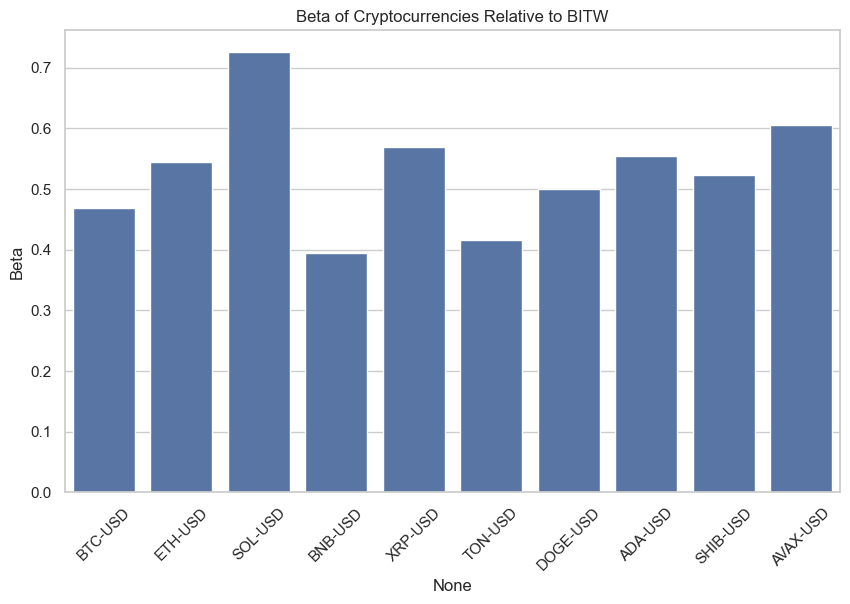

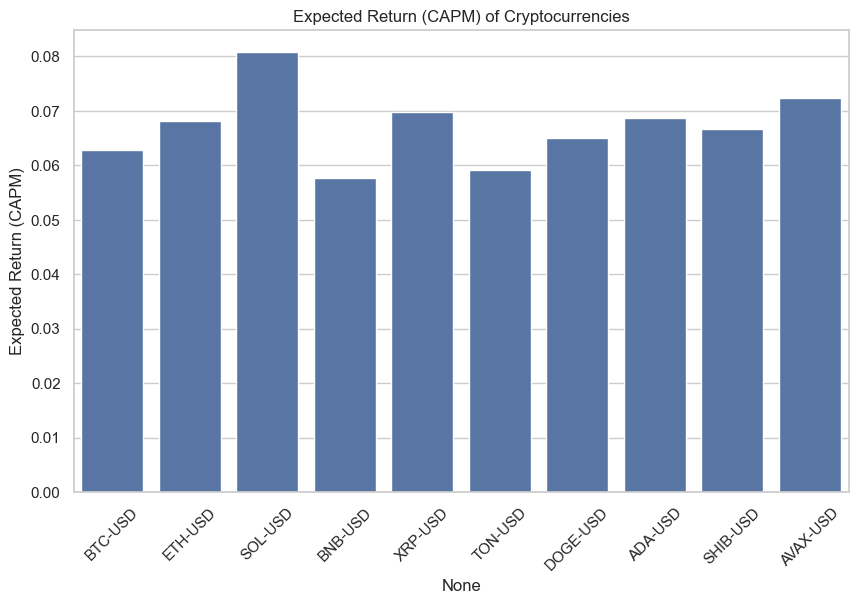

In [39]:
# Setting the style
sns.set(style="whitegrid")

# Plot Beta
plt.figure(figsize=(10, 6))
sns.barplot(x=capm_df.index, y=capm_df['Beta'])
plt.title('Beta of Cryptocurrencies Relative to BITW')
plt.xticks(rotation=45)
plt.show()

# Plot Expected Return (CAPM)
plt.figure(figsize=(10, 6))
sns.barplot(x=capm_df.index, y=capm_df['Expected Return (CAPM)'])
plt.title('Expected Return (CAPM) of Cryptocurrencies')
plt.xticks(rotation=45)
plt.show()